In [83]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

## Loading datasets


In [59]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [60]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Looking into Data

In [61]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


## Analysing Data

In [62]:
print(len(train_data))
train_data = train_data.drop_duplicates('text', keep='last')
print(len(train_data))


7613
7503


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


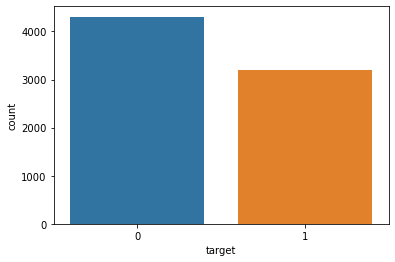

In [92]:
sns.countplot(train_data['target'])
train_data['target'].value_counts()
plt.savefig('count')

**Checking number of unique keywords**

No. of Unique Keyword:  222


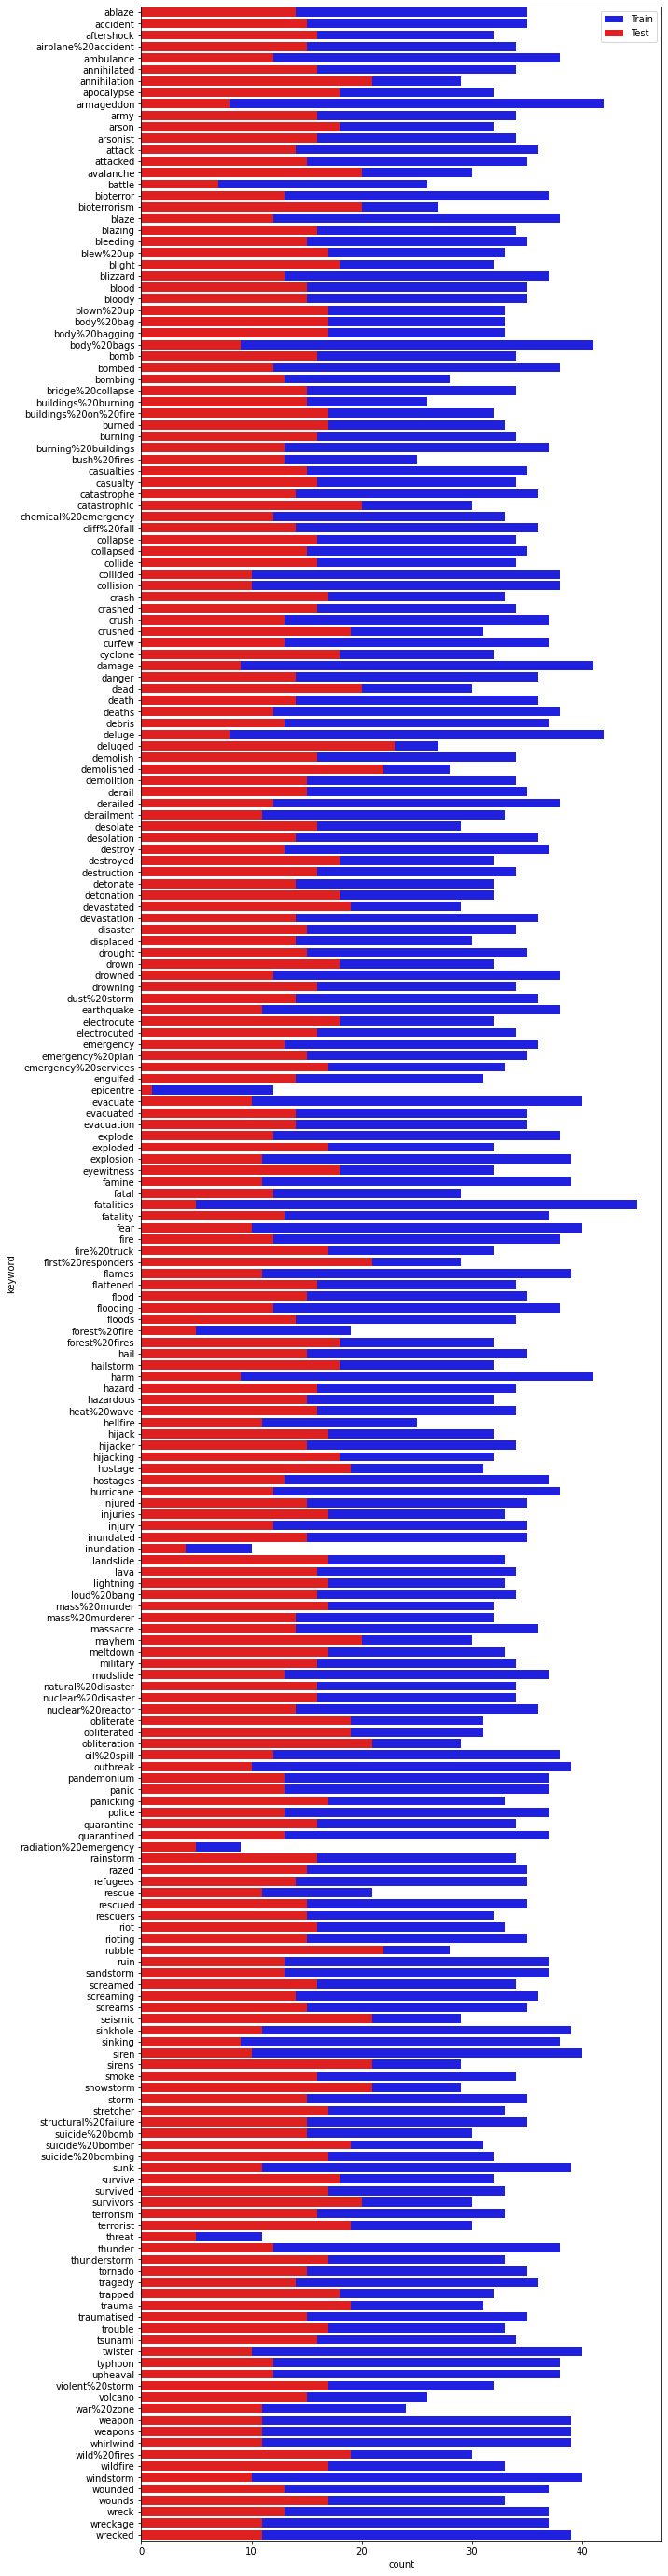

In [93]:
print("No. of Unique Keyword: ", len(train_data.keyword.unique()))
fig = plt.figure(figsize=(10,50))
sns.countplot(y=train_data['keyword'], color = (0,0,1), label='Train')
sns.countplot(y=test_data['keyword'], color=(1,0,0), label='Test')
plt.legend()
fig.savefig('List of keywords')

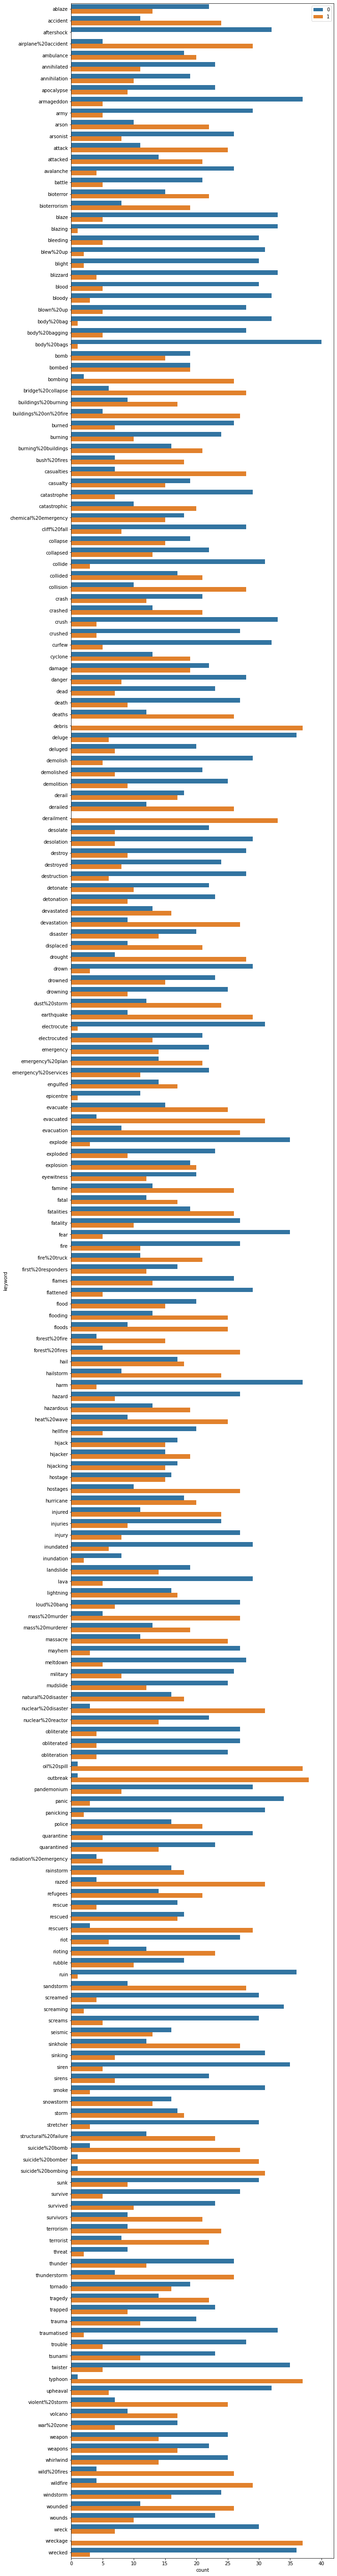

In [94]:
plt.figure(figsize=(10,100))
sns.countplot(data=train_data, y='keyword', hue = 'target')
plt.legend(loc='upper right')
plt.savefig('keyword - Disaster or not')

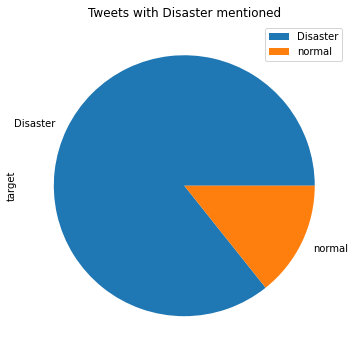

In [95]:
train_data[train_data.text.str.contains("disaster")].target.\
value_counts().to_frame().rename(index={1:"Disaster",0:"normal"}).\
plot.pie(y="target",figsize=(12,6),title="Tweets with Disaster mentioned");
plt.savefig('Distribution of tweets with disaster mentioned')

## Data preprocessing

In [67]:
#converting text data to lower case
train_data.text = train_data.text.apply(lambda x:x.lower())
test_data.text = test_data.text.apply(lambda x:x.lower())

In [68]:
#Removing Hyperlinks
train_data.text = train_data.text.apply(lambda x: re.sub('https?://\S+|www\.\S+', '', x))
test_data.text = test_data.text.apply(lambda x: re.sub('https?://\S+|www\.\S+', '', x))


In [69]:
#Removing square brackets
train_data.text=train_data.text.apply(lambda x:re.sub('\[.*?\]', '', x) )
test_data.text=test_data.text.apply(lambda x:re.sub('\[.*?\]', '', x) )
train_data.text=train_data.text.apply(lambda x:re.sub('<.*?>+', '', x) )
test_data.text=test_data.text.apply(lambda x:re.sub('<.*?>+', '', x) )

In [70]:
#Removing punctuation
train_data.text=train_data.text.apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
test_data.text=test_data.text.apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
train_data.text=train_data.text.apply(lambda x:re.sub('\n' , '', x) )
test_data.text=test_data.text.apply(lambda x:re.sub('\n', '', x) )

In [71]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


### Tokenizing

In [72]:
#Tokenizer
token = nltk.tokenize.RegexpTokenizer(r'\w+')
#applying token
train_data.text=train_data.text.apply(lambda x:token.tokenize(x))
test_data.text=test_data.text.apply(lambda x:token.tokenize(x))
#view
display(train_data.text.head())

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [13000, people, receive, wildfires, evacuation...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

### Removing Stopwords

In [73]:
nltk.download('stopwords')
#removing stop words
train_data.text=train_data.text.apply(lambda x:[w for w in x if w not in stopwords.words('english')])
test_data.text=test_data.text.apply(lambda x:[w for w in x if w not in stopwords.words('english')])
#view
train_data.text.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vigneshwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [13000, people, receive, wildfires, evacuation...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

### Stemming 

In [74]:
#stemmering the text and joining
stemmer = nltk.stem.PorterStemmer()
train_data.text=train_data.text.apply(lambda x:" ".join(stemmer.stem(token) for token in x))
test_data.text=test_data.text.apply(lambda x:" ".join(stemmer.stem(token) for token in x))
#View
train_data.text.head()


0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3    13000 peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
Name: text, dtype: object

### Text Vectorization

In [75]:
count_vectorizer = feature_extraction.text.CountVectorizer()

train_vectors = count_vectorizer.fit_transform(train_data["text"])

test_vectors = count_vectorizer.transform(test_data['text'])

### Ridge classifier

In [76]:
clf = linear_model.RidgeClassifier()

In [77]:
scores = model_selection.cross_val_score(clf, train_vectors, train_data["target"], cv=3, scoring="f1")
scores

array([0.59869138, 0.53441296, 0.62378168])

In [78]:
clf.fit(train_vectors, train_data['target'])

RidgeClassifier()

In [79]:
predictions = clf.predict(test_vectors)

In [80]:
df = pd.DataFrame({'id':test_data.id, 'target':predictions})

In [81]:
output = df.to_csv("submission.csv", index=False)

### Logistic Regression

In [87]:
CLR = LogisticRegression(C=2)
scores2 = model_selection.cross_val_score(CLR, train_vectors, train_data["target"], cv=6, scoring="f1")
scores2

array([0.63605823, 0.53191489, 0.57803468, 0.48770053, 0.5928934 ,
       0.72319688])

In [88]:
CLR.fit(train_vectors, train_data['target'])

LogisticRegression(C=2)

In [89]:
predictions2 = CLR.predict(test_vectors)

In [90]:
df2 = pd.DataFrame({'id':test_data.id, 'target':predictions2})

In [91]:
output2 = df2.to_csv("submissionLR.csv", index=False)